# Siation: Company has struggle for the last yeat to keep employees satisfafied. they even hired a Product Analyst to ensure companyu structure was right.

Now Goal here is to Segment employess see similarities and diferences in the groups taht quit and stay so we can recommend Strategies to Reteain as much employees as possible!

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [307]:
df = pd.read_csv(r'/content/employee_data.csv')
df.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition
0,1001,41,Female,1,2,Sales,5993,3,4,Yes
1,1002,49,Male,8,2,Research & Development,5130,4,2,No
2,1004,37,Male,2,1,Research & Development,2090,3,3,Yes
3,1005,33,Female,3,1,Research & Development,2909,3,3,No
4,1007,27,Male,2,1,Research & Development,3468,3,2,No


In [308]:
df.tail()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition
1465,3061,36,Male,23,2,Research & Development,2571,3,4,No
1466,3062,39,Male,6,3,Research & Development,9991,3,1,No
1467,3064,27,Male,4,2,Research & Development,6142,4,2,No
1468,3065,49,Male,2,2,Sales,5390,3,2,No
1469,3068,34,Male,8,2,Research & Development,4404,3,3,No


In [309]:
df.shape

(1470, 10)

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   EmployeeID         1470 non-null   int64 
 1   Age                1470 non-null   int64 
 2   Gender             1470 non-null   object
 3   DistanceFromHome   1470 non-null   int64 
 4   JobLevel           1470 non-null   int64 
 5   Department         1470 non-null   object
 6   MonthlyIncome      1470 non-null   int64 
 7   PerformanceRating  1470 non-null   int64 
 8   JobSatisfaction    1470 non-null   int64 
 9   Attrition          1470 non-null   object
dtypes: int64(7), object(3)
memory usage: 115.0+ KB


In [311]:
df.isna().sum()

,0
EmployeeID,0
Age,0
Gender,0
DistanceFromHome,0
JobLevel,0
Department,0
MonthlyIncome,0
PerformanceRating,0
JobSatisfaction,0
Attrition,0


In [312]:
df[df.duplicated()]

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition


In [313]:
df.describe()

,EmployeeID,Age,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2024.865306,36.923810,9.192517,2.063946,6502.931293,3.153741,2.728571
std,602.024335,9.135373,8.106864,1.106940,4707.956783,0.360824,1.102846
min,1001.000000,18.000000,1.000000,1.000000,1009.000000,3.000000,1.000000
25%,1491.250000,30.000000,2.000000,1.000000,2911.000000,3.000000,2.000000
50%,2020.500000,36.000000,7.000000,2.000000,4919.000000,3.000000,3.000000
75%,2555.750000,43.000000,14.000000,3.000000,8379.000000,3.000000,4.000000
max,3068.000000,60.000000,29.000000,5.000000,19999.000000,4.000000,4.000000


In [314]:
df['JobLevel'].value_counts()

,count
JobLevel,
1,543
2,534
3,218
4,106
5,69


In [315]:
df[df['JobLevel']==5]

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition
25,1032,53,Female,5,5,Research & Development,19094,3,3,No
29,1038,46,Female,2,5,Sales,18947,3,1,No
45,1058,41,Female,12,5,Research & Development,19545,3,3,Yes
62,1080,50,Female,7,5,Research & Development,18740,3,3,No
105,1140,59,Female,2,5,Human Resources,18844,4,4,No
...,...,...,...,...,...,...,...,...,...,...
1331,2867,48,Male,10,5,Research & Development,19665,3,2,No
1377,2941,49,Male,2,5,Research & Development,19161,3,4,No
1401,2973,55,Male,26,5,Human Resources,19636,3,2,No
1437,3022,39,Male,9,5,Research & Development,19431,3,4,No


In [316]:
df['Department'].value_counts()

,count
Department,
Research & Development,961
Sales,446
Human Resources,63


In [317]:
df['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


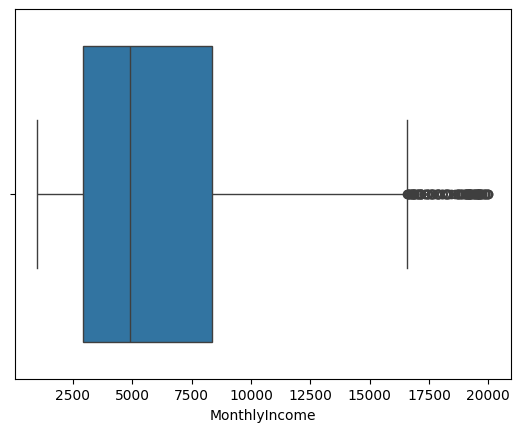

In [318]:
sns.boxplot(x=df['MonthlyIncome']);

In [319]:
df[df['MonthlyIncome']>15000]

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition
18,1023,53,Female,2,4,Sales,15427,3,4,No
25,1032,53,Female,5,5,Research & Development,19094,3,3,No
29,1038,46,Female,2,5,Sales,18947,3,1,No
45,1058,41,Female,12,5,Research & Development,19545,3,3,Yes
62,1080,50,Female,7,5,Research & Development,18740,3,3,No
...,...,...,...,...,...,...,...,...,...,...
1374,2938,58,Female,21,4,Sales,17875,3,4,No
1377,2941,49,Male,2,5,Research & Development,19161,3,4,No
1401,2973,55,Male,26,5,Human Resources,19636,3,2,No
1437,3022,39,Male,9,5,Research & Development,19431,3,4,No


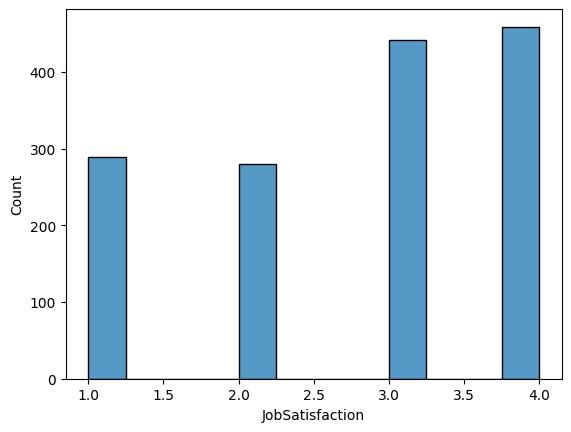

In [320]:
sns.histplot(df['JobSatisfaction']);

In [321]:
df[df['JobSatisfaction']<=2].iloc[:,3].value_counts().round(2).sort_values(ascending=True)

,count
DistanceFromHome,
27,5
20,6
21,6
18,7
15,7
23,7
22,7
12,8
19,9


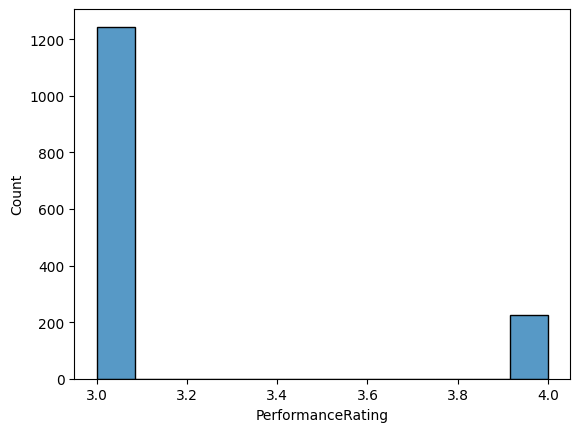

In [322]:
sns.histplot(df['PerformanceRating']);

In [323]:
df[df['PerformanceRating']>3]

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition
1,1002,49,Male,8,2,Research & Development,5130,4,2,No
6,1010,59,Female,3,1,Research & Development,2670,4,1,No
7,1011,30,Male,24,1,Research & Development,2693,4,3,No
8,1012,38,Male,23,3,Research & Development,9526,4,3,No
21,1027,36,Male,9,1,Sales,3407,4,1,Yes
...,...,...,...,...,...,...,...,...,...,...
1441,3026,56,Male,1,2,Research & Development,6306,4,3,No
1445,3034,41,Female,28,4,Research & Development,13570,4,2,No
1446,3035,34,Female,28,2,Sales,6712,4,3,No
1447,3036,36,Male,15,2,Sales,5406,4,4,No


In [324]:
# Exploratory Data Analysis

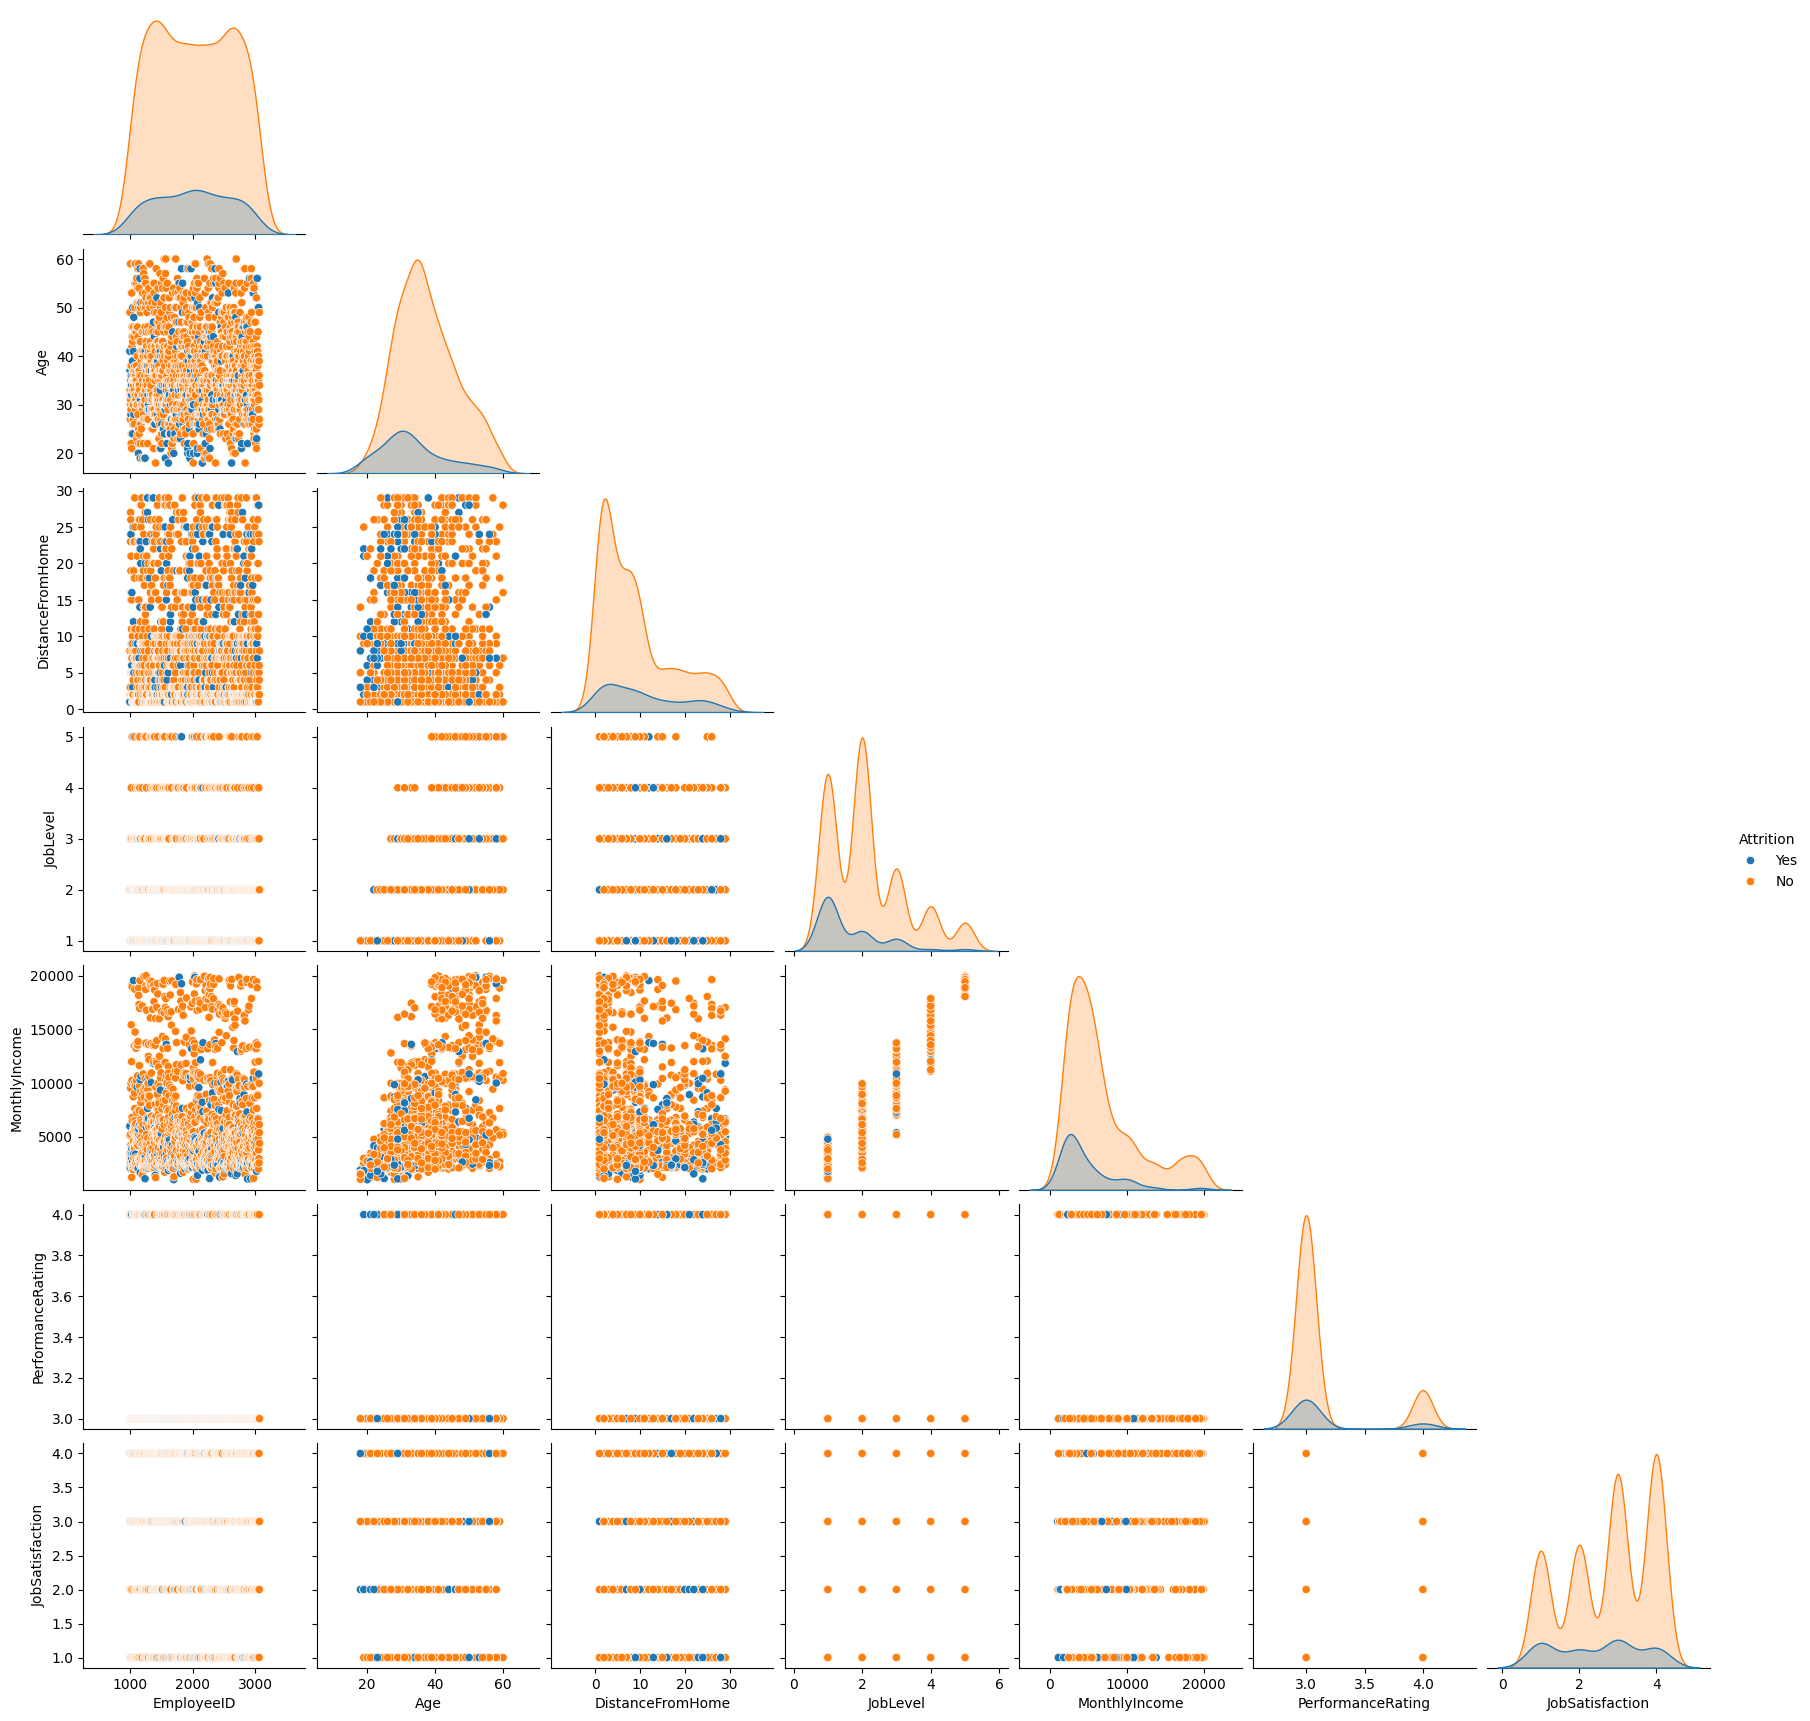

In [325]:
sns.pairplot(df,corner=True,hue='Attrition');

# Findings

* People around 25 trend to quit more
* People aroung 30-40 Trend to stay (Makes sence)
* People who Stays trend to get higher Monthlyincome

In [326]:
df.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition
0,1001,41,Female,1,2,Sales,5993,3,4,Yes
1,1002,49,Male,8,2,Research & Development,5130,4,2,No
2,1004,37,Male,2,1,Research & Development,2090,3,3,Yes
3,1005,33,Female,3,1,Research & Development,2909,3,3,No
4,1007,27,Male,2,1,Research & Development,3468,3,2,No


In [327]:
# Feature Engineering

df_eng = df.copy()

df_eng['Gender']=np.where(df_eng['Gender']=='Male',1,0)

df_eng['Attrition']=np.where(df_eng['Attrition']=='Yes',1,0)


In [328]:
df_eng[['Research & Development','Sales']] = pd.get_dummies(df_eng['Department'],drop_first=True).astype(int)
df_eng=df_eng.drop('Department',axis=1)

In [329]:
df_eng.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition,Research & Development,Sales
0,1001,41,0,1,2,5993,3,4,1,0,1
1,1002,49,1,8,2,5130,4,2,0,1,0
2,1004,37,1,2,1,2090,3,3,1,1,0
3,1005,33,0,3,1,2909,3,3,0,1,0
4,1007,27,1,2,1,3468,3,2,0,1,0


In [330]:
df_eng.drop(['EmployeeID','Attrition'],axis=1,inplace=True)

In [331]:
df_eng.head()

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Research & Development,Sales
0,41,0,1,2,5993,3,4,0,1
1,49,1,8,2,5130,4,2,1,0
2,37,1,2,1,2090,3,3,1,0
3,33,0,3,1,2909,3,3,1,0
4,27,1,2,1,3468,3,2,1,0


In [332]:
# Standarizing Data
from sklearn.preprocessing import StandardScaler

StandardScaler_std = StandardScaler()
standirized = StandardScaler_std.fit_transform(df_eng)
std_df = pd.DataFrame(standirized,columns=df_eng.columns)
std_df

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Research & Development,Sales
0,0.446350,-1.224745,-1.010909,-0.057788,-0.108350,-0.426230,1.153254,-1.374051,1.515244
1,1.322365,0.816497,-0.147150,-0.057788,-0.291719,2.346151,-0.660853,0.727775,-0.659960
2,0.008343,0.816497,-0.887515,-0.961486,-0.937654,-0.426230,0.246200,0.727775,-0.659960
3,-0.429664,-1.224745,-0.764121,-0.961486,-0.763634,-0.426230,0.246200,0.727775,-0.659960
4,-1.086676,0.816497,-0.887515,-0.961486,-0.644858,-0.426230,-0.660853,0.727775,-0.659960
...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.816497,1.703764,-0.057788,-0.835451,-0.426230,1.153254,0.727775,-0.659960
1466,0.227347,0.816497,-0.393938,0.845911,0.741140,-0.426230,-1.567907,0.727775,-0.659960
1467,-1.086676,0.816497,-0.640727,-0.057788,-0.076690,2.346151,-0.660853,0.727775,-0.659960
1468,1.322365,0.816497,-0.887515,-0.057788,-0.236474,-0.426230,-0.660853,-1.374051,1.515244


In [340]:
# Applying K-Means and check silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# create an empty list to hold many inertia values
inertia_values = []
Silhouette_scores = []

# create 2 - 15 clusters, and add the intertia scores to the list

for k in range(2, 16): # total clusters to try
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(std_df) # Dataset
    inertia_values.append(kmeans.inertia_)
    Silhouette_scores.append(silhouette_score(std_df,kmeans.labels_,metric='euclidean',sample_size=None))

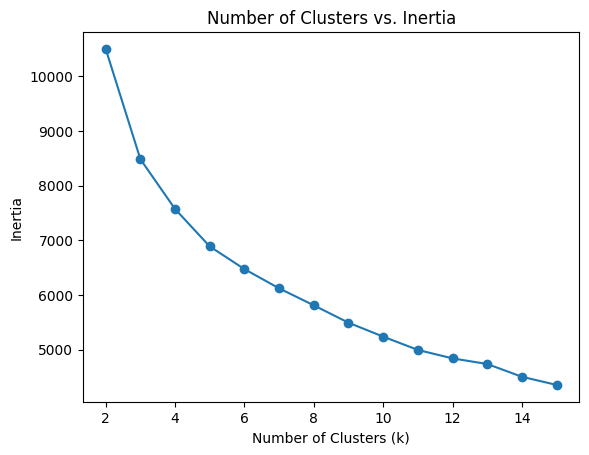

In [341]:
# plot the data
inertia_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");


# Look fot he elbow where adding another cluster does not affect the next to drop
# Fit a cluster with best kmeans interpret if makes sence great if not try another n_cluster number

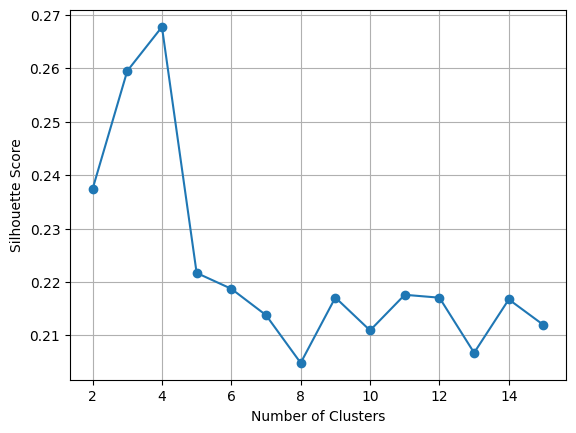

In [349]:
# Plot custers vs Silhouette Score

# Convert the Silhouette_scores list to a Pandas Series
silhouette_series = pd.Series(Silhouette_scores, index=range(2, 16))

silhouette_series.plot(marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');
plt.grid()

In [361]:
## Looks like 4 clusters is the best number
kmeans_4 = KMeans(n_clusters=4,n_init='auto',random_state=2023)
kmeans_4.fit(std_df)

KMeans(n_clusters=4, random_state=2023)

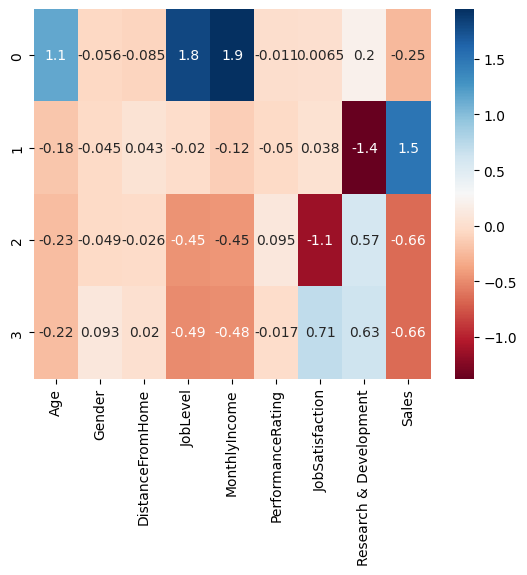

In [362]:
pd.DataFrame(kmeans_4.cluster_centers_,columns=df_eng.columns)
sns.heatmap(pd.DataFrame(kmeans_4.cluster_centers_,columns=df_eng.columns),cmap='RdBu',annot=True);

# Name Clusters

* Cluster 0 : High (Age,JobLevel,MonthlyIncome): Seniors
* Cluster 1 : Sales
* Cluster 2 : Low (JobSatisfaction, Sales) Unhappy Strugglers
* Cluster 3 : High  (JobSatisfaction) low (Sales) Happy Strugglers

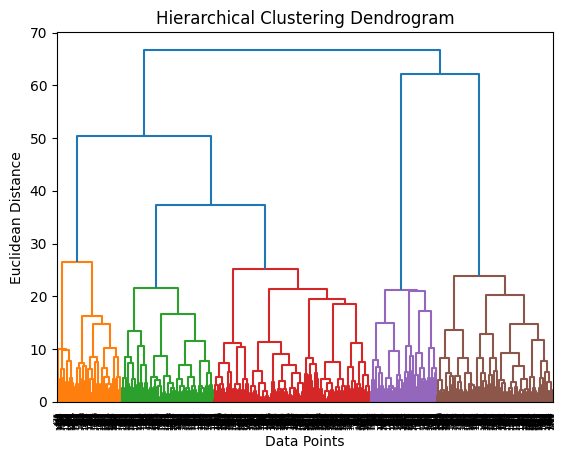

In [358]:
#Dendogram


#Allows to visualize hierarchical clustering clusters
# Visualize the clusters with a dendogram


from scipy.cluster.hierarchy import linkage, dendrogram

linkage_matrix = linkage(std_df, method='ward')  #Dataset df_eng or std or center
dendrogram_info = dendrogram(linkage_matrix,color_threshold=30) #set color_threshold


plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance");

In [364]:
# Data point for each cluster

data_points = pd.Series(dendrogram_info['ivl'],name='Data Point').astype('int') # dendrogram_info same as dendogram
data_points.head()

,Data Point
0,475
1,46
2,545
3,205
4,563


In [365]:
# Get the clusters from the dendragram

from scipy.cluster.hierarchy import fcluster
den_clusters = pd.Series(fcluster(linkage_matrix,5, criterion='distance'),name='Dendogram Cluster') #threshold for color_threshold
den_clusters.head()

,Dendogram Cluster
0,75
1,15
2,40
3,25
4,47


In [366]:
# view the cluster assignments from the dendrogram

den_clusters_df = den_clusters.reset_index()
den_clusters_df.columns = ['Data Point', 'Dendrogram Cluster']
den_clusters_df.head()

,Data Point,Dendrogram Cluster
0,0,75
1,1,15
2,2,40
3,3,25
4,4,47


In [367]:
# view the data points within each cluster (sorted)
den_clusters_df.sort_values(['Dendrogram Cluster', 'Data Point'])

,Data Point,Dendrogram Cluster
46,46,1
182,182,1
205,205,1
475,475,1
545,545,1
...,...,...
1326,1326,94
1416,1416,94
1448,1448,94
1452,1452,94


In [368]:
# view the number of data points within each cluster
# How many Employees  we got for each cluster
den_clusters_df['Dendrogram Cluster'].value_counts()

,count
Dendrogram Cluster,
47,50
24,43
37,38
25,38
27,38
...,...
93,4
64,4
65,4


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


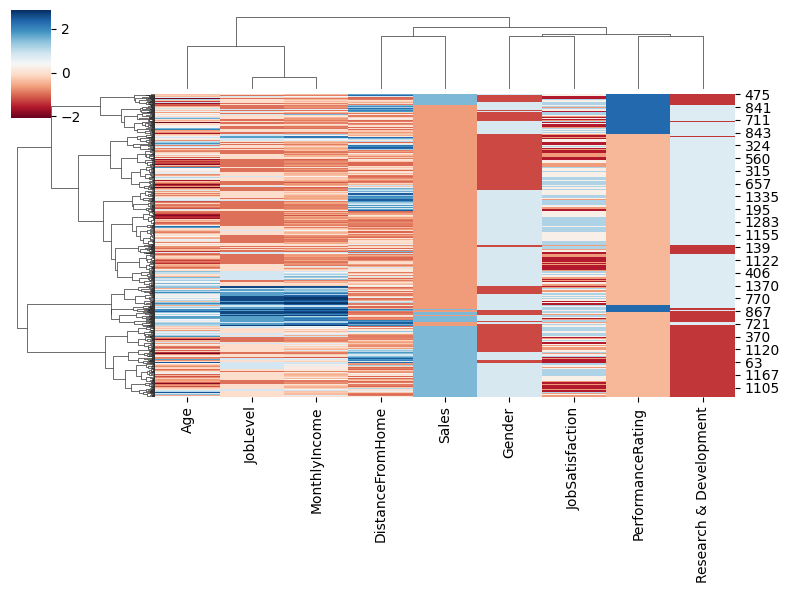

In [373]:
sns.clustermap(data=std_df,method='ward',cmap='RdBu',figsize=(8,6),xticklabels=df_eng.columns) # Add z_score=0 if no color difference
plt.show() ;

# interpretation

* cluster 0: High PerformanceRating
* cluster 1: less Femeles in Reseach & Development
* cluster 2,3: regular sales mix female and male regular performance rating
* cluseter 4: Seniors joblevel and monthly income high
* cluster 5: high sales

In [377]:
# Dimensionality  Reduction

from sklearn.decomposition import PCA
pca = PCA(n_components=2)  #2 to 3 if goals is visualization
pca.fit(std_df)


PCA(n_components=2)

In [378]:
# Explained Variance Radio
# Keep componenets between 90 - 80 %
pca.explained_variance_ratio_

array([0.26424776, 0.20859734])

In [379]:
# view componentes
pca.components_

array([[ 0.43386936, -0.04957216, -0.00263102,  0.60641044,  0.59572931,
        -0.02529375, -0.00426779, -0.20737546,  0.20737275],
       [-0.21355479, -0.01403293,  0.01860203, -0.13950526, -0.17289836,
        -0.04170537,  0.01467443, -0.67128583,  0.67224734]])

In [380]:
#View columns again
df_eng.columns

Index(['Age', 'Gender', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome',
       'PerformanceRating', 'JobSatisfaction', 'Research & Development',
       'Sales'],
      dtype='object')

In [381]:
#create DataFrame easier to see

# 0  = PC1
#1 = PC2

Componen_Interpretation=pd.DataFrame(pca.components_,columns=df_eng.columns)
Componen_Interpretation

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Research & Development,Sales
0,0.433869,-0.049572,-0.002631,0.606410,0.595729,-0.025294,-0.004268,-0.207375,0.207373
1,-0.213555,-0.014033,0.018602,-0.139505,-0.172898,-0.041705,0.014674,-0.671286,0.672247


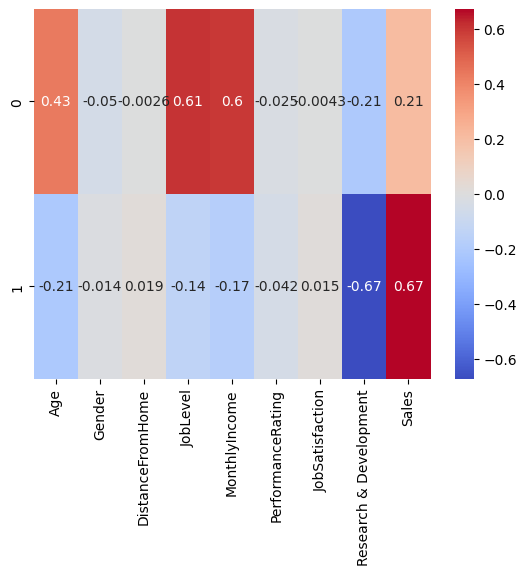

In [383]:
#Visual

sns.heatmap(Componen_Interpretation,cmap='coolwarm',annot=True);

# Interpretation
* pc1: Seniors, mid age, JobLevel and MonthlyIncome
* pc2: High Sales Low Researh & Deovs

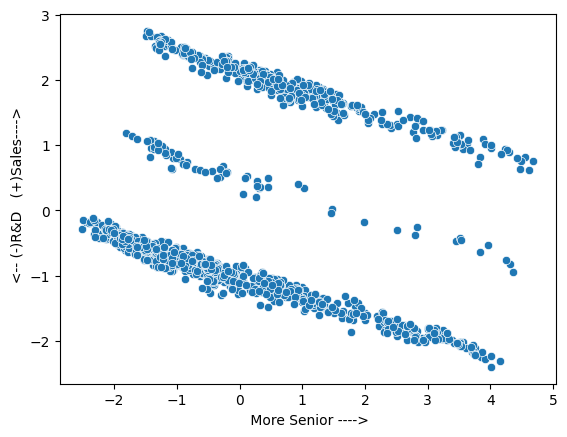

In [398]:
data_tansform = pd.DataFrame(pca.transform(std_df),columns=['pc1','pc2'])

data_tansform.head()

sns.scatterplot(x='pc1',y='pc2',data=data_tansform);
plt.xlabel(' More Senior ---->'); # X-axis
plt.ylabel('  <-- (-)R&D   (+)Sales---->'); # y-axis

In [411]:
# Visualize Components with Cluster

# Applying K-Means to cluster


from sklearn.cluster import KMeans
# Choose the no. of clusters
kmeans_4 = KMeans(n_clusters=4,n_init='auto',random_state=2023) #same clusters as components
kmeans_4.fit(std_df)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


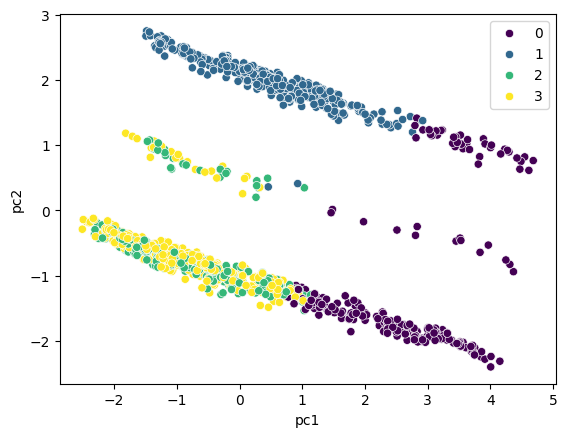

In [414]:
# Visualize Clusters

sns.scatterplot(x='pc1',y='pc2',data=data_tansform,hue=kmeans_4.labels_,palette='viridis');

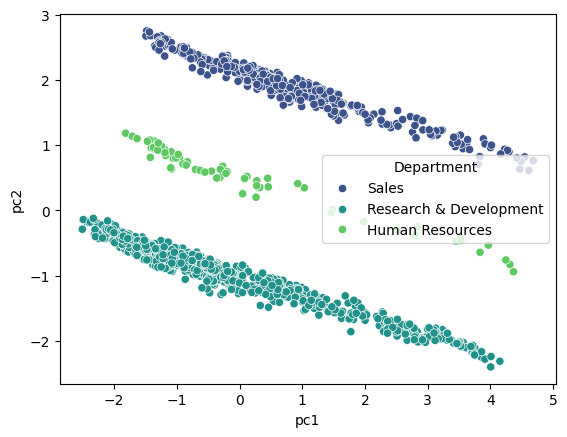

In [415]:
# Visualize Clusters

sns.scatterplot(x='pc1',y='pc2',data=data_tansform,hue=df['Department'],palette='viridis');

In [416]:
# Create a DataFrame for the heatmap

centroids_df = pd.DataFrame(centroids, columns=df_eng.columns)

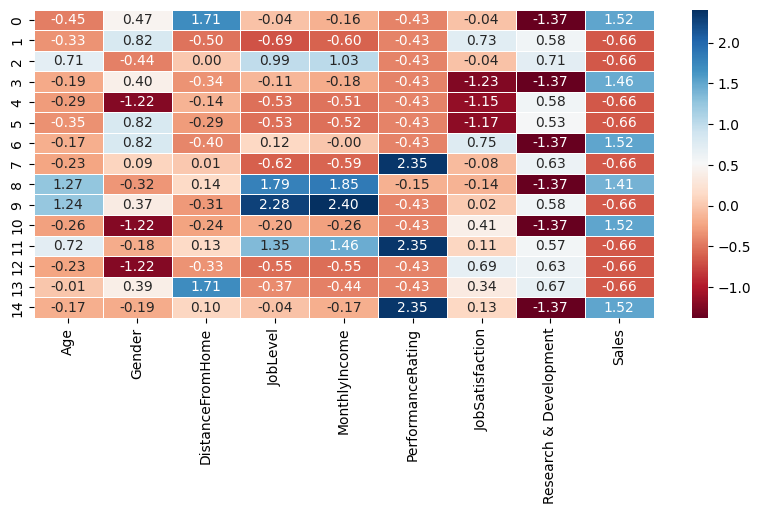

In [417]:
# create heatmap

plt.figure(figsize=(10,4))
sns.heatmap(centroids_df,annot=True,cmap='RdBu',fmt='.2f',linewidths=0.5)
plt.show()

In [420]:
# Removing Deparment column
df_eng_2 = df_eng.drop(['Research & Development','Sales'],axis=1)
df_eng_2

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction
0,41,0,1,2,5993,3,4
1,49,1,8,2,5130,4,2
2,37,1,2,1,2090,3,3
3,33,0,3,1,2909,3,3
4,27,1,2,1,3468,3,2
...,...,...,...,...,...,...,...
1465,36,1,23,2,2571,3,4
1466,39,1,6,3,9991,3,1
1467,27,1,4,2,6142,4,2
1468,49,1,2,2,5390,3,2


In [422]:
from sklearn.preprocessing import StandardScaler

StandardScaler_std_2 = StandardScaler()
standirized_2 = StandardScaler_std.fit_transform(df_eng_2)
std_df_2 = pd.DataFrame(standirized_2,columns=df_eng_2.columns)
std_df_2

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction
0,0.446350,-1.224745,-1.010909,-0.057788,-0.108350,-0.426230,1.153254
1,1.322365,0.816497,-0.147150,-0.057788,-0.291719,2.346151,-0.660853
2,0.008343,0.816497,-0.887515,-0.961486,-0.937654,-0.426230,0.246200
3,-0.429664,-1.224745,-0.764121,-0.961486,-0.763634,-0.426230,0.246200
4,-1.086676,0.816497,-0.887515,-0.961486,-0.644858,-0.426230,-0.660853
...,...,...,...,...,...,...,...
1465,-0.101159,0.816497,1.703764,-0.057788,-0.835451,-0.426230,1.153254
1466,0.227347,0.816497,-0.393938,0.845911,0.741140,-0.426230,-1.567907
1467,-1.086676,0.816497,-0.640727,-0.057788,-0.076690,2.346151,-0.660853
1468,1.322365,0.816497,-0.887515,-0.057788,-0.236474,-0.426230,-0.660853


In [430]:
# Applying K-Means and check silhouette_score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# create an empty list to hold many inertia values

inertia_values = []
Silhouette_scores = []


# create 2 - 15 clusters, and add the intertia scores to the list

for k in range(2, 16): # total clusters to try
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(std_df_2) # Dataset
    inertia_values.append(kmeans.inertia_)
    Silhouette_scores.append(silhouette_score(std_df_2, kmeans.labels_,metric='euclidean',sample_size=None))

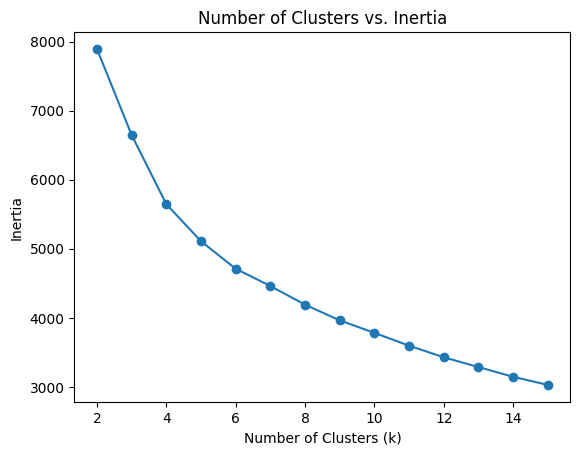

In [431]:
# plot Inertia Values

inertia_series = pd.Series(inertia_values, index=range(2, 16)) #update index to range of clusters
inertia_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

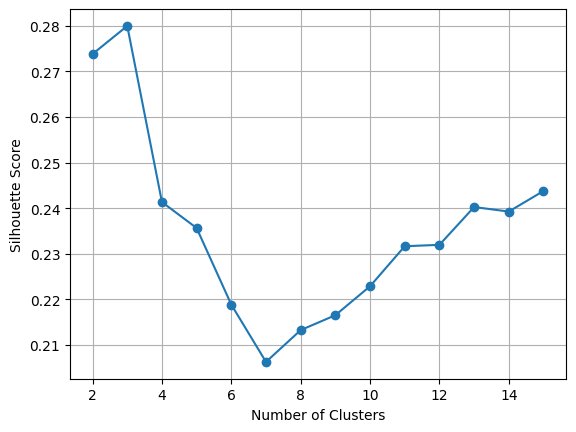

In [433]:
# Plot custers vs Silhouette Score

# Convert the Silhouette_scores list to a Pandas Series

silhouette_series = pd.Series(Silhouette_scores, index=range(2, 16))

silhouette_series.plot(marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');
plt.grid()

In [458]:
# Trying with 3

from sklearn.cluster import KMeans

kmeans_5 = KMeans(n_clusters=5,n_init='auto',random_state=2023)
kmeans_5.fit(std_df_2)

KMeans(n_clusters=5, random_state=2023)

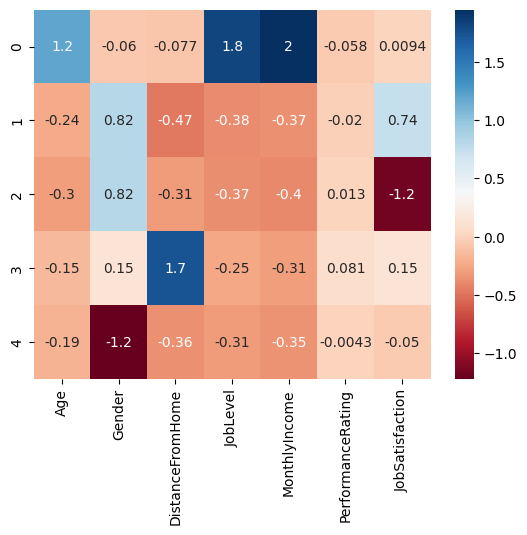

In [459]:
pd.DataFrame(kmeans_5.cluster_centers_,columns=df_eng_2.columns)
sns.heatmap(pd.DataFrame(kmeans_5.cluster_centers_,columns=df_eng_2.columns),cmap='RdBu',annot=True);


# Interpretation
* 0: Seniors +Age, JobLevel, Monthlyincome
* 1: Mostly Men Happy with their Jobs
* 2: Mostly Men Unhappy with their Jobs
* 3: Long Distance from home
* 4: Mostly Females jrs

In [460]:
#Fit PCA model

from sklearn.decomposition import PCA
pca = PCA(n_components=2)  #2 to 3 if goals is visualization
pca.fit(std_df_2)

PCA(n_components=2)

In [461]:
# Explained Variance Radio
# Keep componenets between 90 - 80 %

pca.explained_variance_ratio_

array([0.33354222, 0.14850324])

In [462]:
# view componentes

pca.components_

array([[ 0.47124275, -0.0460627 , -0.00629691,  0.62393147,  0.62140377,
        -0.01687984, -0.00712661],
       [-0.01896906,  0.58615904, -0.41405416,  0.01838822,  0.02778096,
        -0.4833175 ,  0.49991119]])

In [463]:
#View columns again

df_eng_2.columns

Index(['Age', 'Gender', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome',
       'PerformanceRating', 'JobSatisfaction'],
      dtype='object')

In [464]:
#create DataFrame easier to see

# 0  = PC1
#1 = PC2
Componen_Interpretation=pd.DataFrame(pca.components_,columns=df_eng_2.columns)
Componen_Interpretation

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction
0,0.471243,-0.046063,-0.006297,0.623931,0.621404,-0.016880,-0.007127
1,-0.018969,0.586159,-0.414054,0.018388,0.027781,-0.483317,0.499911


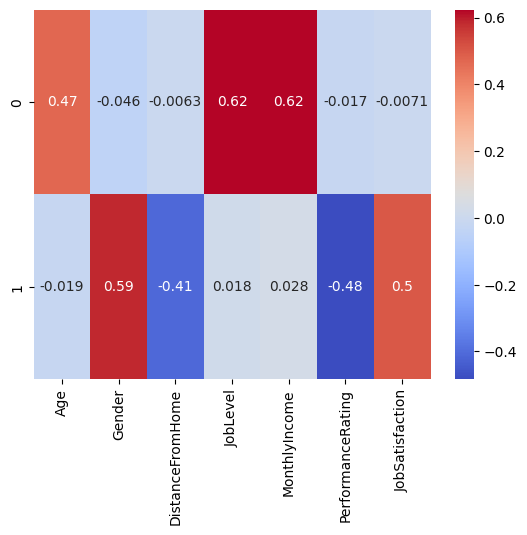

In [465]:
#Visual

sns.heatmap(Componen_Interpretation,cmap='coolwarm',annot=True);

# interpretation
* 0: Seniors
* 1: Pople who life near by and perfornace is low

        pc1       pc2       pc3
0  0.168712  0.470665 -0.598970
1  0.334248 -0.959030  1.112754
2 -1.205213  1.131272 -0.316222
3 -1.210236 -0.103169 -0.998987
4 -1.532824  0.706731 -0.829482


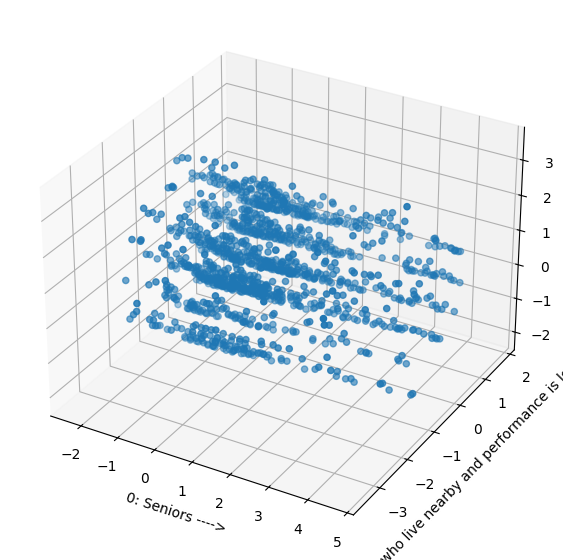

In [466]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming `std_df_2` is your standardized DataFrame
# Perform PCA transformation
pca = PCA(n_components=3)  # Using 3 components for 3D plot
data_transform = pd.DataFrame(pca.fit_transform(std_df_2), columns=['pc1', 'pc2', 'pc3'])

# Display the first few rows of the transformed data
print(data_transform.head())

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the 3D scatter plot
ax.scatter(data_transform['pc1'], data_transform['pc2'], data_transform['pc3'])

# Adding labels to the axes
ax.set_xlabel('0: Seniors ---->')  # X-axis label
ax.set_ylabel('People who live nearby and performance is low ---->')  # Y-axis label
ax.set_zlabel('PC3')  # Z-axis label, customize as needed

# Show the plot
plt.show()


In [467]:
from sklearn.cluster import KMeans

# Choose the no. of clusters

kmeans = KMeans(n_clusters=3,n_init='auto',random_state=2023) #same clusters as components
kmeans.fit(std_df_2)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

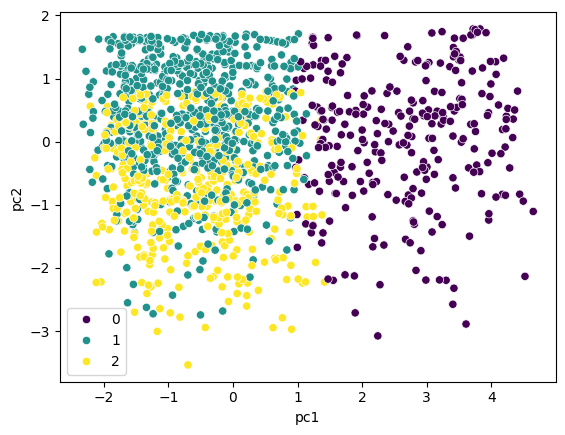

In [468]:
# Visualize Clusters

sns.scatterplot(x='pc1',y='pc2',data=data_tansform,hue=kmeans.labels_,palette='viridis');

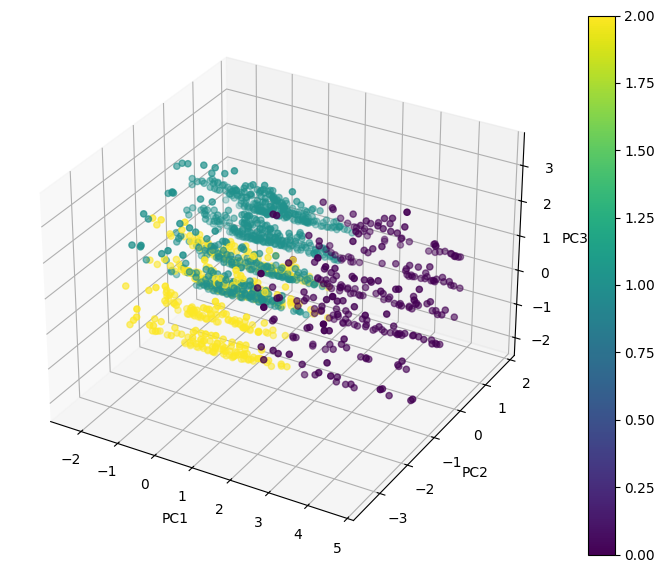

In [469]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have your data in a DataFrame called `data_transform`
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the 3D scatter plot
sc = ax.scatter(data_transform['pc1'], data_transform['pc2'], data_transform['pc3'], c=kmeans.labels_, cmap='viridis')

# Adding labels to the axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Adding a color bar
plt.colorbar(sc)

# Display the plot
plt.show()


In [482]:
# Interpretation
* 0: Seniors +Age, JobLevel, Monthlyincome
* 1: Mostly Men Happy with their Jobs
* 2: Mostly Men Unhappy with their Jobs
* 3: Long Distance from home
* 4: Mostly Females jrs

SyntaxError: invalid syntax (<ipython-input-482-dbdedd173669>, line 2)

In [490]:
clusters = pd.DataFrame(kmeans_5.labels_,columns=['Clusters'])
clusters.head()

,Clusters
0,4
1,2
2,1
3,4
4,2


In [492]:
inter_dic = {
0: 'Seniors +Age, JobLevel, Monthlyincome',
1: 'Mostly Men Happy with their Jobs',
2: 'Mostly Men Unhappy with their Jobs',
3: 'Long Distance from home',
4: 'Mostly Females jrs'
}

clusters['Cluster_Name'] = clusters['Clusters'].map(inter_dic)
clusters.head()

,Clusters,Cluster_Name
0,4,Mostly Females jrs
1,2,Mostly Men Unhappy with their Jobs
2,1,Mostly Men Happy with their Jobs
3,4,Mostly Females jrs
4,2,Mostly Men Unhappy with their Jobs


In [496]:
clusters = pd.concat([clusters,df['Attrition']],axis=1)
clusters

,Clusters,Cluster_Name,Attrition
0,4,Mostly Females jrs,Yes
1,2,Mostly Men Unhappy with their Jobs,No
2,1,Mostly Men Happy with their Jobs,Yes
3,4,Mostly Females jrs,No
4,2,Mostly Men Unhappy with their Jobs,No
...,...,...,...
1465,3,Long Distance from home,No
1466,2,Mostly Men Unhappy with their Jobs,No
1467,2,Mostly Men Unhappy with their Jobs,No
1468,2,Mostly Men Unhappy with their Jobs,No


In [497]:
clusters['Attrition']=np.where(clusters['Attrition']=='Yes',1,0)

In [500]:
clusters.groupby(['Cluster_Name'])['Attrition'].mean().sort_values(ascending=False)

,Attrition
Cluster_Name,
Long Distance from home,0.225532
Mostly Men Unhappy with their Jobs,0.200000
Mostly Females jrs,0.154589
Mostly Men Happy with their Jobs,0.152113
"Seniors +Age, JobLevel, Monthlyincome",0.079646


In [502]:
clusters=pd.concat([clusters,df['Department']],axis=1)
clusters.head()

,Clusters,Cluster_Name,Attrition,Department
0,4,Mostly Females jrs,1,Sales
1,2,Mostly Men Unhappy with their Jobs,0,Research & Development
2,1,Mostly Men Happy with their Jobs,1,Research & Development
3,4,Mostly Females jrs,0,Research & Development
4,2,Mostly Men Unhappy with their Jobs,0,Research & Development


In [504]:
clusters.groupby(['Cluster_Name','Department'])['Attrition'].mean().sort_values(ascending=False)

Cluster_Name                           Department            
Long Distance from home                Human Resources           0.571429
                                       Sales                     0.291667
Mostly Females jrs                     Human Resources           0.272727
Mostly Men Unhappy with their Jobs     Human Resources           0.235294
                                       Sales                     0.222222
Mostly Females jrs                     Sales                     0.200000
Mostly Men Unhappy with their Jobs     Research & Development    0.185430
Long Distance from home                Research & Development    0.179487
Mostly Men Happy with their Jobs       Sales                     0.174312
Seniors +Age, JobLevel, Monthlyincome  Sales                     0.155172
Mostly Men Happy with their Jobs       Research & Development    0.147826
Mostly Females jrs                     Research & Development    0.126866
Mostly Men Happy with their Jobs       Human Resources           0.062500
Seniors +Age, JobLevel, Monthlyincome  Research & Development    0.057692
                                       Human Resources           0.000000
Name: Attrition, dtype: float64

# Recommendatiuons:

* Long Distance from home 	Human Resources 	Offer Work from Home positions men!!! for real 2025 still going to the office from NY to LA walking xd

* Mostly Females jrs 	Human Resources and Sales  have one on one meetings ask them if they feel confertable, need training are there any challenges?

* Mostly Men Unhappy with their Jobs Reach out and ask what's going on do they need soemthing from Managers or HR?


_______________________________________________________________________________
* This was a challenging Project tryng to figure out the best way to approach but it was fun hope you enjoy it as much as I did only took 3hrs men and yeah i used google Colab